In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from scipy import stats
import numpy as np

In [226]:
data = pd.read_csv('../data/raw_data', skiprows=3)
data = data.drop(['Unnamed: 0', 'result', 'table'], axis=1)
data

,_start,_stop,_time,_value,_field,_measurement,zählername
0,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:15:00Z,4447.924999,counter,stromzaehler,Hausanschluss
1,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:30:00Z,4448.149197,counter,stromzaehler,Hausanschluss
2,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:45:00Z,4448.391416,counter,stromzaehler,Hausanschluss
3,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T01:00:00Z,4448.619568,counter,stromzaehler,Hausanschluss
4,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T01:15:00Z,4448.845053,counter,stromzaehler,Hausanschluss
...,...,...,...,...,...,...,...
34018,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:15:00Z,6756.948733,counter,stromzaehler,Hausanschluss
34019,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:30:00Z,6757.162733,counter,stromzaehler,Hausanschluss
34020,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:45:00Z,6757.420233,counter,stromzaehler,Hausanschluss
34021,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T22:00:00Z,6757.659178,counter,stromzaehler,Hausanschluss


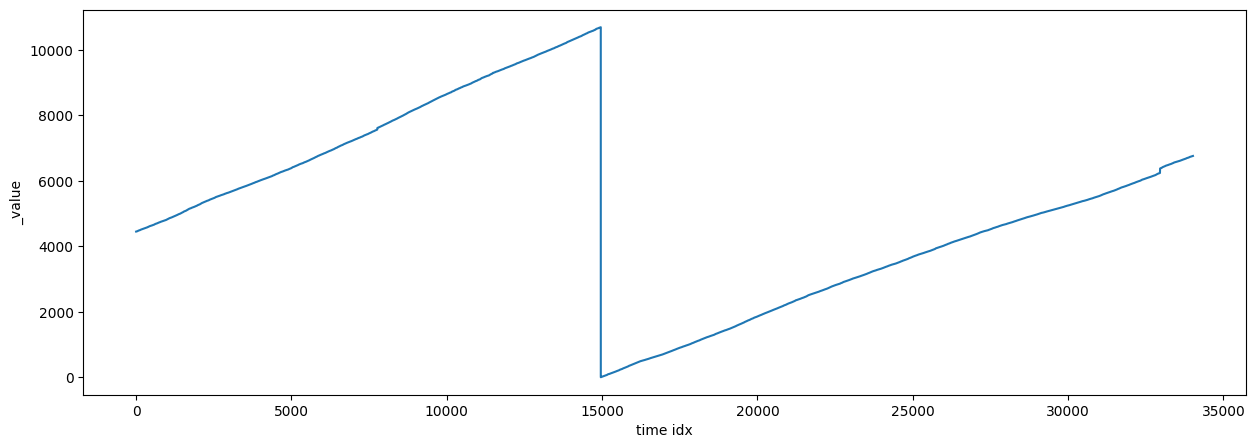

In [227]:
target = data['_value']
features = data['_time']

plt.figure(figsize=(15,5))
plt.plot(target)
plt.xlabel('time idx')
plt.ylabel('_value')
plt.show()

In [228]:
# split data and put on top
jump_idx = target[target == 0]
part_1 = target[:14959]
part_2 = target[14959:]

diff = target[14958]
part_2 += diff

target = pd.concat([part_1, part_2], axis=0)
target.shape

(34023,)

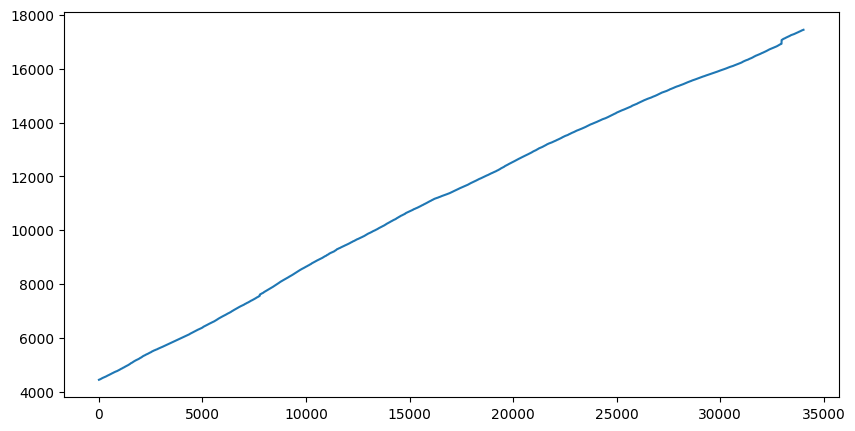

In [229]:
plt.figure(figsize=(10,5))
plt.plot(target)
plt.show()

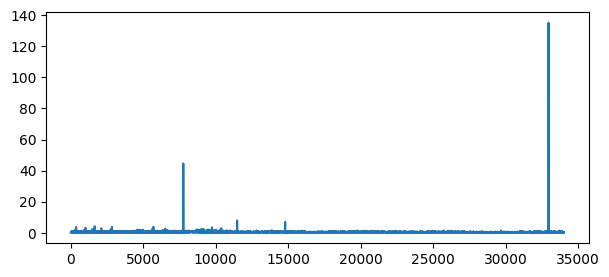

In [230]:
diff = target.diff()
diff = diff.drop([0], axis=0)
plt.figure(figsize=(7,3))
plt.plot(diff)
plt.show()

In [231]:
# standardize data
diff = diff.to_frame()
diff = diff[(np.abs(stats.zscore(diff)) < 3).all(axis=1)]

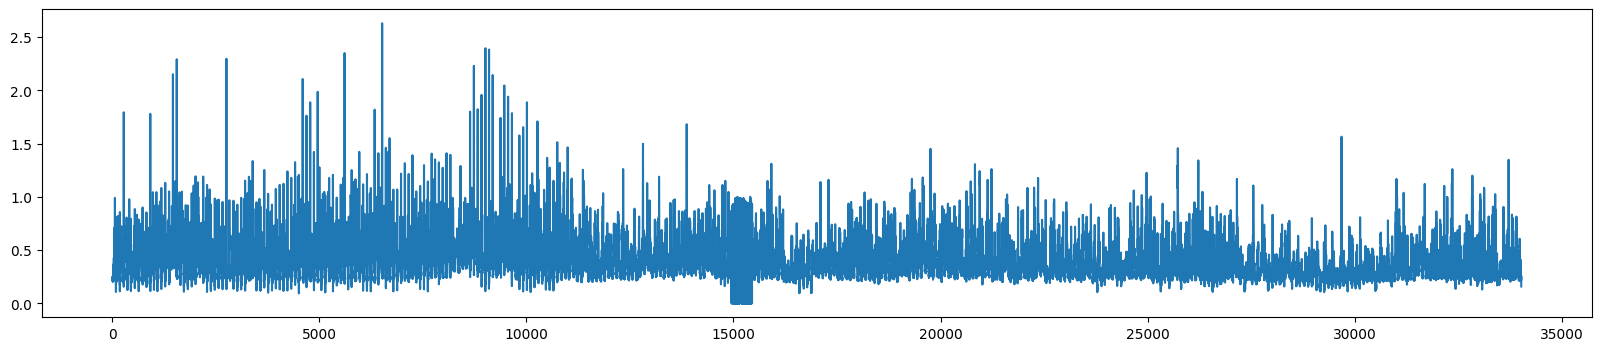

In [232]:
plt.figure(figsize=(20,4))
plt.plot(diff)
plt.show()

In [242]:
diff.iloc[:, 0]

1        0.224198
2        0.242219
3        0.228152
4        0.225485
5        0.221716
           ...   
34018    0.236844
34019    0.214000
34020    0.257500
34021    0.238944
34022    0.157547
Name: _value, Length: 34008, dtype: float64

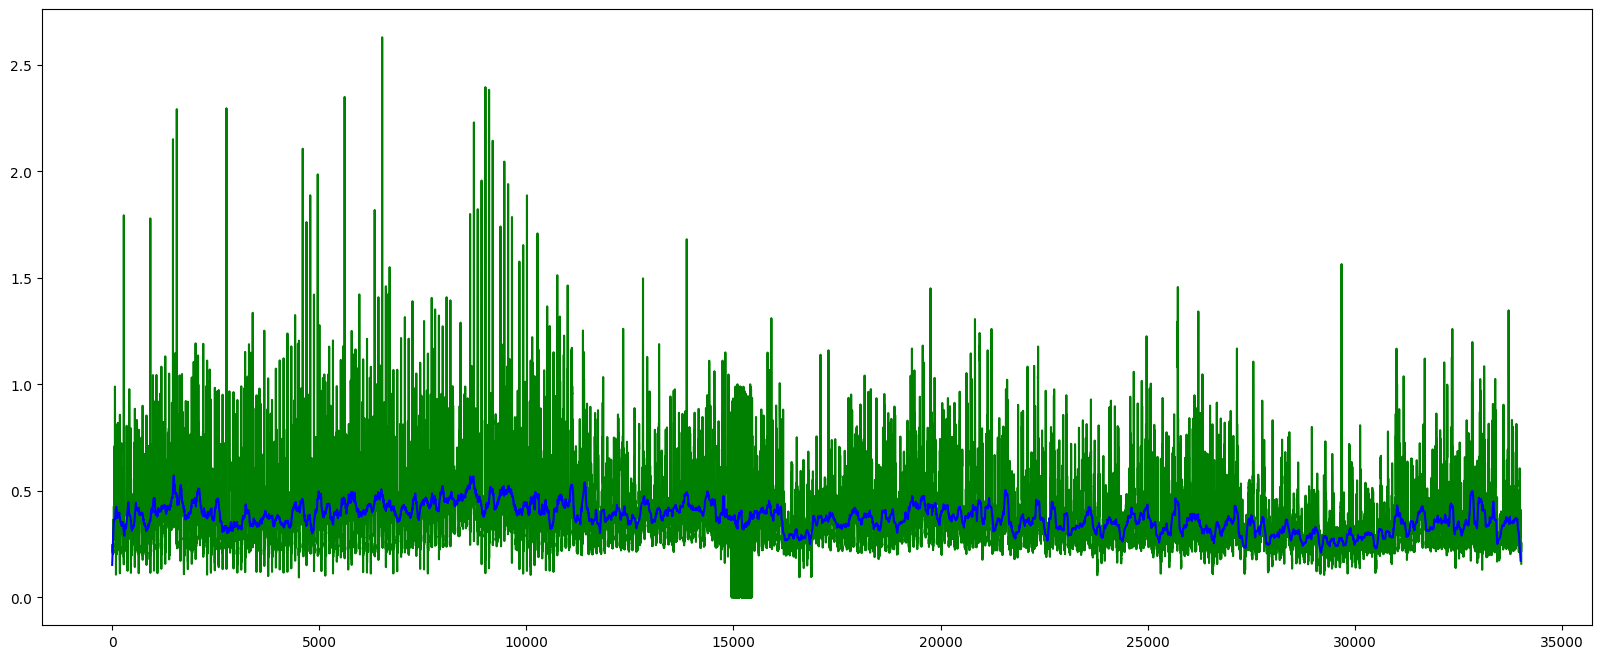

In [252]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "same") / w

plt.figure(figsize=(20,8))
plt.plot(diff, color='green')
plt.plot(moving_average(diff.iloc[:, 0],96), color='blue')
plt.show()